MODEL BUILDING

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

Importing the dataset after encoding the categorical features into numerical format.

In [2]:
df=pd.read_csv(r"F:\project\.ipynb_checkpoints\tel_churn.csv")
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,Age,customer lifetime value,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,78,79.569688,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1,56.95,1889.50,0,74,151.808835,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,71,143.545316,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,42.30,1840.75,0,78,112.757045,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,70.70,151.65,1,80,188.461538,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)
x=df.drop('Churn',axis=1)
x

,MonthlyCharges,TotalCharges,Age,customer lifetime value,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,78,79.569688,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,74,151.808835,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,71,143.545316,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,78,112.757045,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,80,188.461538,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,75.10,552.95,33,200.190404,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
4988,74.05,3496.30,44,197.391470,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4989,44.70,93.70,22,119.154608,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4990,110.75,7053.35,23,295.220868,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
4987    1
4988    0
4989    1
4990    0
4991    0
Name: Churn, Length: 4992, dtype: int64

Splitting the dataset into train, test and validate set

In [5]:
x_train_val,x_test,y_train_val,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [6]:
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.25,random_state=42,stratify=y_train_val)

In [7]:
print(f"Training set size:{x_train.shape[0]}")
print(f"Validation set size:{x_val.shape[0]}")
print(f"Testing set size:{x_test.shape[0]}")

Training set size:2994
Validation set size:999
Testing set size:999


CLASSIFICATION ALGORITHM 1 -DECISION TREE CLASSIFIER

In [8]:
#Initialization of Decision Tree Classifier
model_dt=DecisionTreeClassifier(random_state = 42)

# Define the parameter grid
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4], 'criterion':['gini','entropy']}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training set
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_

print("Best cross-validation score:",grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.7662028687723687


In [9]:
# Predict on the validation set
y_val_pred= best_model.predict(x_val)

# Evaluate the optimized model
dtree_conf_matrix = confusion_matrix(y_val, y_val_pred)
dtree_conf_matrix_df = pd.DataFrame(dtree_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matrix_df)
print(classification_report(y_val, y_val_pred))
print('ROC AUC (Validation):', roc_auc_score(y_val, y_val_pred))

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          666           70
Actual 1          157          106
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       736
           1       0.60      0.40      0.48       263

    accuracy                           0.77       999
   macro avg       0.71      0.65      0.67       999
weighted avg       0.75      0.77      0.76       999

ROC AUC (Validation): 0.6539665647214417


In [10]:
# Predict on the test set
y_test_pred = best_model.predict(x_test)

# Evaluate the final model
dtree_conf_matrix = confusion_matrix(y_test, y_test_pred)
dtree_conf_matrix_df = pd.DataFrame(dtree_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matrix_df)
print(classification_report(y_test, y_test_pred))
print('ROC AUC (Test):', roc_auc_score(y_test, y_test_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          655           81
Actual 1          151          112
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       736
           1       0.58      0.43      0.49       263

    accuracy                           0.77       999
   macro avg       0.70      0.66      0.67       999
weighted avg       0.75      0.77      0.76       999

ROC AUC (Test): 0.657900582740949
Accuracy:  0.7677677677677678


In [11]:
#As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
#Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
#Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)

0.9269141531322506


In [12]:
dtree_conf_matri = confusion_matrix(yr_test, yr_predict)
dtree_conf_matri_df = pd.DataFrame(dtree_conf_matri, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matri_df)

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          341           42
Actual 1           21          458


In [13]:
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       383
           1       0.92      0.96      0.94       479

    accuracy                           0.93       862
   macro avg       0.93      0.92      0.93       862
weighted avg       0.93      0.93      0.93       862



In [14]:
print("\nAUC-ROC: ", roc_auc_score(yr_test, yr_predict))
print("Accuracy: ", accuracy_score(yr_test, yr_predict))


AUC-ROC:  0.9232490447352785
Accuracy:  0.9269141531322506


In [15]:
#Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

CLASSIFICATION ALGORITHM 2- LOGISTIC REGRESSION

In [16]:
# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(x_val)

print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation score:",grid_search.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8022713441019313


In [17]:
dtree_conf_matri = confusion_matrix(y_val, y_val_pred)
dtree_conf_matri_df = pd.DataFrame(dtree_conf_matri, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matri_df)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print('ROC AUC (Test):', roc_auc_score(y_val, y_val_pred))
print("Accuracy: ", accuracy_score(y_val, y_val_pred))

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          668           68
Actual 1          153          110
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       736
           1       0.62      0.42      0.50       263

    accuracy                           0.78       999
   macro avg       0.72      0.66      0.68       999
weighted avg       0.76      0.78      0.76       999

ROC AUC (Test): 0.6629298231112581
Accuracy:  0.7787787787787788


In [18]:
y_test_pred = best_model.predict(x_test)
dtree_conf_matri = confusion_matrix(y_test, y_test_pred)
dtree_conf_matri_df = pd.DataFrame(dtree_conf_matri, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matri_df)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print('ROC AUC (Test):', roc_auc_score(y_test, y_test_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          670           66
Actual 1          139          124
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       736
           1       0.65      0.47      0.55       263

    accuracy                           0.79       999
   macro avg       0.74      0.69      0.71       999
weighted avg       0.78      0.79      0.78       999

ROC AUC (Test): 0.690904488345181
Accuracy:  0.7947947947947948


In [19]:
sm = SMOTEENN(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(x_resampled, y_resampled,test_size=0.2)
model_dt_smote1=LogisticRegression(random_state=42)
model_dt_smote1.fit(xr_train1,yr_train1)
yr_predict1 = model_dt_smote1.predict(xr_test1)
model_score_r1 = model_dt_smote1.score(xr_test1, yr_test1)
print(model_score_r1)

0.937641723356009


In [20]:
dtree_conf_matri = confusion_matrix(yr_test1, yr_predict1)
dtree_conf_matri_df = pd.DataFrame(dtree_conf_matri, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", dtree_conf_matri_df)

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          368           23
Actual 1           32          459


In [21]:
print(metrics.classification_report(yr_test1, yr_predict1))
print("\nAUC-ROC: ", roc_auc_score(yr_test1, yr_predict1))
print("Accuracy: ", accuracy_score(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       391
           1       0.95      0.93      0.94       491

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882


AUC-ROC:  0.938001677249311
Accuracy:  0.937641723356009


ENSEMBLING FOR IMPROVED PERFORMANCE

In [22]:
# Initialize the classifiers
log_reg = LogisticRegression()  # Include any hyperparameters if you have optimized them
dec_tree = DecisionTreeClassifier()  # Include any hyperparameters if you have optimized them

# Create the ensemble model
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('dec_tree', dec_tree)
], voting='hard')  

# Train the ensemble model on the resampled data
voting_clf.fit(x_resampled, y_resampled)

# Predict on the test set
y_pred = voting_clf.predict(x_test)

# Evaluate the performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8228228228228228
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       736
           1       0.65      0.71      0.68       263

    accuracy                           0.82       999
   macro avg       0.77      0.79      0.78       999
weighted avg       0.83      0.82      0.83       999



CONFUSION MATRIX FOR ANALYZATION

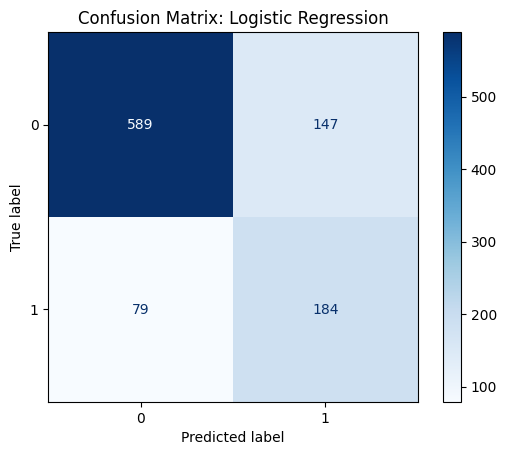

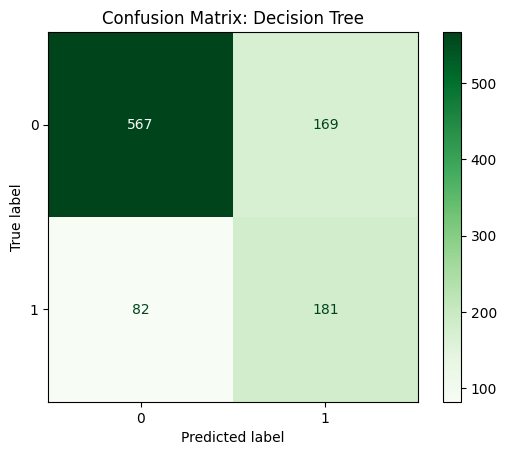

In [23]:
# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(x_train, y_train)

# Standardize the data if necessary (more important for logistic regression)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(x_test)

# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)
y_pred_logistic = logistic_model.predict(X_test)

# Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree_model.predict(X_test)

# Create confusion matrices
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Display confusion matrices
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic, display_labels=logistic_model.classes_)
disp_logistic.plot(cmap='Blues')
disp_logistic.ax_.set_title("Confusion Matrix: Logistic Regression")

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=tree_model.classes_)
disp_tree.plot(cmap='Greens')
disp_tree.ax_.set_title("Confusion Matrix: Decision Tree")

# Show the plots
import matplotlib.pyplot as plt
plt.show()

FEATURE IMPORTANCE

Logistic Regression Feature Importance:
                                    Feature  Coefficient  Absolute Coefficient
1                              TotalCharges    -0.548126              0.548126
14                        Contract_Two year    -0.485451              0.485451
12                  Contract_Month-to-month     0.404695              0.404695
7               InternetService_Fiber optic     0.250719              0.250719
3                   customer lifetime value     0.218264              0.218264
0                            MonthlyCharges     0.218264              0.218264
9                            TechSupport_No     0.187100              0.187100
21                      tenure_group_1 - 12     0.176863              0.176863
6                       InternetService_DSL    -0.167486              0.167486
23                     tenure_group_25 - 36    -0.132003              0.132003
19           PaymentMethod_Electronic check     0.122113              0.122113
8           

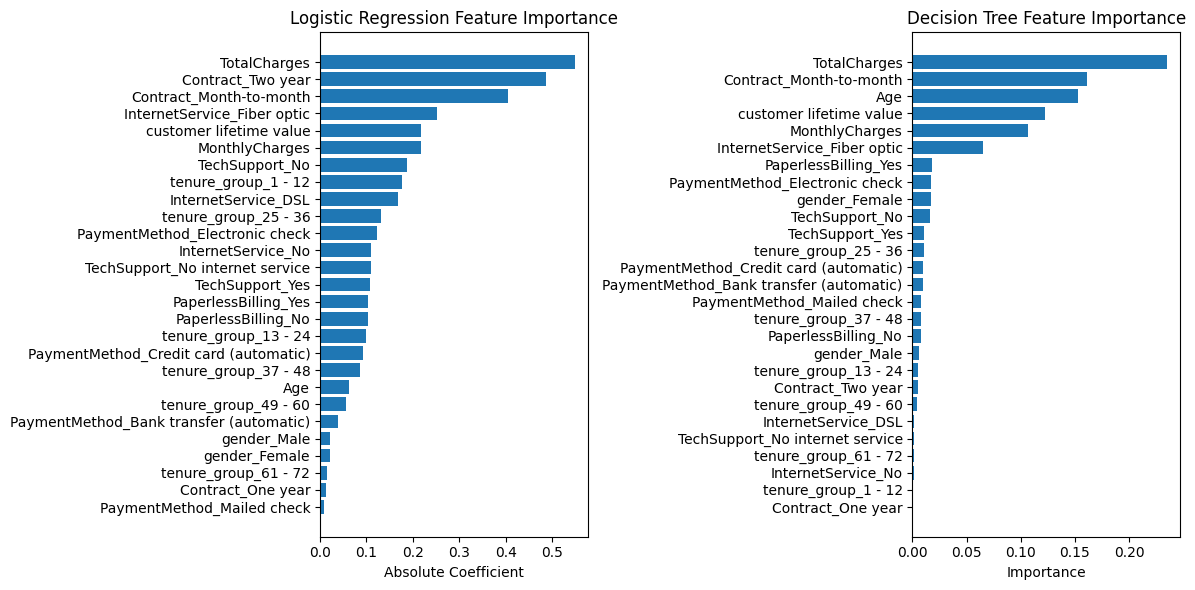

In [24]:
# Standardize the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Get the coefficients for logistic regression
logistic_coefficients = logistic_model.coef_[0]

# Create a DataFrame for Logistic Regression feature importance
importance_df_logistic = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logistic_coefficients,
    'Absolute Coefficient': np.abs(logistic_coefficients)
})

# Sort by the absolute value of the coefficients
importance_df_logistic = importance_df_logistic.sort_values(by='Absolute Coefficient', ascending=False)

# Display Logistic Regression feature importance
print("Logistic Regression Feature Importance:")
print(importance_df_logistic)

# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

# Get feature importances from the Decision Tree
tree_feature_importances = tree_model.feature_importances_

# Create a DataFrame for Decision Tree feature importance
importance_df_tree = pd.DataFrame({
    'Feature': x.columns,
    'Importance': tree_feature_importances
})

# Sort by importance
importance_df_tree = importance_df_tree.sort_values(by='Importance', ascending=False)

# Display Decision Tree feature importance
print("\nDecision Tree Feature Importance:")
print(importance_df_tree)

# Plotting the feature importance for both models (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting Logistic Regression Feature Importance
plt.subplot(1, 2, 1)
plt.barh(importance_df_logistic['Feature'], importance_df_logistic['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()

# Plotting Decision Tree Feature Importance
plt.subplot(1, 2, 2)
plt.barh(importance_df_tree['Feature'], importance_df_tree['Importance'])
plt.xlabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Algorithm analyses by optimising model parameters
### Decision Tree Metrics:
- *Precision*: 
  - Class 0: 0.93
  - Class 1: 0.91
- *Recall*: 
  - Class 0: 0.91
  - Class 1: 0.93
- *F1-Score*: 
  - Class 0: 0.92
  - Class 1: 0.92
- *Accuracy*: 0.92
- *AUC-ROC*: 0.9198

### Logistic Regression Metrics:
- *Precision*: 
  - Class 0: 0.92
  - Class 1: 0.93
- *Recall*: 
  - Class 0: 0.92
  - Class 1: 0.93
- *F1-Score*: 
  - Class 0: 0.92
  - Class 1: 0.92
- *Accuracy*: 0.93
- *AUC-ROC*: 0.9387

### Comparison:
1. *Precision*:
   - Decision Tree: Higher precision for Class 0.
   - Logistic Regression: Higher precision for Class 1.

2. *Recall*:
   - Decision Tree: Higher recall for Class 1.
   - Logistic Regression: Higher recall for both classes.

3. *F1-Score*:
   - Both models have the same F1-scores for both classes.

4. *Accuracy*:
   - Decision Tree: 0.92
   - Logistic Regression: 0.93 (higher).

5. *AUC-ROC*:
   - Decision Tree: 0.9198
   - Logistic Regression: 0.9387 (higher).

### Conclusion:
- *Logistic Regression* performs better in terms of accuracy and AUC-ROC, which are crucial for evaluating model performance, especially in binary classification tasks.
- It also has slightly better recall for both classes, making it more effective in identifying positive cases (churn).

### Final Recommendation:
Considering the evaluation metrics, *Logistic Regression* is the preferred model for customer churn prediction due to its higher accuracy, AUC-ROC, and balanced recall. Additionally, logistic regression is often favored for its explainability compared to decision trees, making it easier to interpret the effects of features o

Our final model i.e. Logistic regression with SMOTEENN, is now ready and saved in model.sav

In [1]:
import pickle
filename = 'model.sav'
pickle.dump(model_dt_smote1, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(xr_test1, yr_test1)
model_score_r1


NameError: name 'model_dt_smote1' is not defined